In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter as c
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import classification_report
from scipy.stats import randint


# Reading The Dataset

In [2]:
data=pd.read_csv('indicators.csv')

In [3]:
countriesNameColumn=data['CountryName']
countriesCodeColumn=data['CountryCode']

In [4]:
data.shape

(5656458, 6)

In [5]:
data.size

33938748

In [6]:
data.head(15)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [7]:
data.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


# Check Unique Values In Dataset

### First column(CountryName)

In [8]:
countries=data['CountryName'].unique() # returns array

In [9]:
# list(countries) #converst from array to list

In [10]:

print(f"The dataset contains data of {len(countries)} countries")

The dataset contains data of 247 countries


In [11]:
CountryCode=data['CountryCode'].unique() 

In [12]:
len(CountryCode)

247

In [13]:
IndicatorName=data['IndicatorName'].unique() 

In [14]:
len(IndicatorName)

1344

In [15]:
Years=data['Year'].unique() 

In [16]:
print(len(Years))

56


In [17]:
print(f"from {min(Years)} to {max(Years)}")

from 1960 to 2015


# CO-2 Emission Of The Countries.

#### as our data set contains other than co2 so we need to extract only co2 emission

In [18]:
Co2Indicator='CO2 emissions \(metric tons'

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\Admin\AppData\Local\Temp\ipykernel_25344\3905939272.py:1: SyntaxWarning: invalid escape sequence '\('
  Co2Indicator='CO2 emissions \(metric tons'


### India's Co2 Emission

In [19]:
CountryCode='IND'
#extract country & indicator
c1= data['CountryCode'].str.contains(CountryCode)
i1=data['IndicatorName'].str.contains(Co2Indicator)

dataOfIndia=data[c1 & i1]
dataOfIndia.head(10) #(1960-69)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900
151960,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,0.333331
183696,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,0.337854
215614,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,0.331763
248229,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,0.353281
281013,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,0.351991


### Usa Co2 emission

In [20]:
CountryCode='USA'
#extract country & indicator
c2= data['CountryCode'].str.contains(CountryCode)
i2=data['IndicatorName'].str.contains(Co2Indicator)

dataOfUsa=data[c2 & i2]
dataOfUsa.head(10) #(1960-69)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119
166672,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,17.451725
198040,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,18.121073
230758,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,18.598318
263313,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,19.089389
296298,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,19.857946


#### Singapore co2 emission

In [21]:
CountryCode='SGP'
#extract country & indicator
c5= data['CountryCode'].str.contains(CountryCode)
i5=data['IndicatorName'].str.contains(Co2Indicator)

dataOfSgp=data[c5 & i5]
dataOfSgp.head(10) #(1960-69)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18930,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.846368
44969,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.229944
73101,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.472918
101695,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.893765
130742,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,2.011115
162246,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,1.340945
193732,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,0.348805
226302,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,1.546459
258885,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,2.693750
291835,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,3.527860


#### BRB CO2 emission

In [22]:
CountryCode='BRB'
#extract country & indicator
c3= data['CountryCode'].str.contains(CountryCode)
i3=data['IndicatorName'].str.contains(Co2Indicator)

dataOfBrb=data[c3 & i3]
dataOfBrb.head(10) #(1960-69)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4812,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.746313
28743,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.838899
55693,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.119411
84086,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.816330
112785,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.766085
142348,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,0.872454
174211,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,1.134077
205826,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,1.425763
238527,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,1.855151
271222,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,2.019146


#### ARB co2 Emission

In [23]:
CountryCode='ARB'
#extract country & indicator
c4= data['CountryCode'].str.contains(CountryCode)
i4=data['IndicatorName'].str.contains(Co2Indicator)

dataOfArb=data[c4 & i4]
dataOfArb.head(10) #(1960-69)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
23204,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.685501
49821,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.761148
78260,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.875124
106885,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.999248
136012,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,1.166075
168048,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,1.273618
199385,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,1.333305
232124,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,1.548404
264671,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,1.795446


# Understanding Data Type And Summary Of Features

In [24]:
data.describe()  #statstical values

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [25]:
data.info()  #dataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


# Observing Target,Numerical And Categorical Columns

In [26]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4], dtype=int64))

In [27]:
# categorical columns
categorical = data.select_dtypes(include=['object']).columns
categorical
for cat in categorical:
    print("column Name",cat)
    print("count of classes :",data[cat].nunique())
    

column Name CountryName
count of classes : 247
column Name CountryCode
count of classes : 247
column Name IndicatorName
count of classes : 1344
column Name IndicatorCode
count of classes : 1344


In [28]:
# numerical Column
numerical = data.select_dtypes(include=['float64', 'int64']).columns
for num in numerical:
    print("column name",num)
    print("count of classes :",data[num].nunique())

column name Year
count of classes : 56
column name Value
count of classes : 3601477


# Take Care Of Missing Data

In [29]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [30]:
data['IndicatorName'].fillna(data['IndicatorName'].mode(),inplace=True)
data['CountryName'].fillna(data['CountryName'].mode(),inplace=True)
data['CountryCode'].fillna(data['CountryCode'].mode(),inplace=True)


In [31]:
if data['Value'].isnull().any().sum()!=0:
    data["Value"].fillna(data['Value'].mean(),inplace=True)
    print("Null values Removed")
else:
    print("No null Values")
    

No null Values


# Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
data1 = data.copy()

for col in categorical:
    print("LABEL ENCODING OF:", col)
    LE = LabelEncoder()
    data[col] = LE.fit_transform(data[col])
    print(col,"is Encoded") 
   


LABEL ENCODING OF: CountryName
CountryName is Encoded
LABEL ENCODING OF: CountryCode
CountryCode is Encoded
LABEL ENCODING OF: IndicatorName
IndicatorName is Encoded
LABEL ENCODING OF: IndicatorCode
IndicatorCode is Encoded


In [33]:
le1=LabelEncoder()
le1.fit_transform(countriesNameColumn)
pickle.dump(le1,open("CountryName","wb"))

In [34]:
le2=LabelEncoder()
le2.fit_transform(countriesCodeColumn)
pickle.dump(le2,open("CountryCode","wb"))

In [35]:
le3=LabelEncoder()
le3.fit_transform(data1['IndicatorName'])
pickle.dump(le3,open("IndicatorName","wb"))

In [36]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,7,5,44,1195,1960,1.335609e+02
1,7,5,48,1218,1960,8.779760e+01
2,7,5,49,1219,1960,6.634579e+00
3,7,5,50,1220,1960,8.102333e+01
4,7,5,90,640,1960,3.000000e+06


# Data Visualization

Text(0, 0.5, 'Frequency')

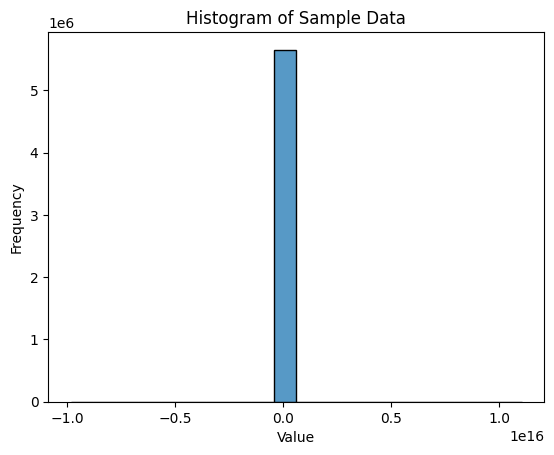

In [37]:
sns.histplot(data['Value'], bins=20)
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')


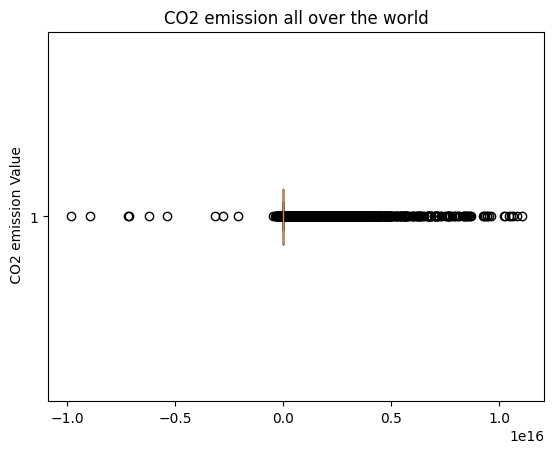

In [38]:
plt.boxplot(data['Value'],vert=False)
plt.ylabel(' CO2 emission Value')
plt.title('CO2 emission all over the world')
plt.show()

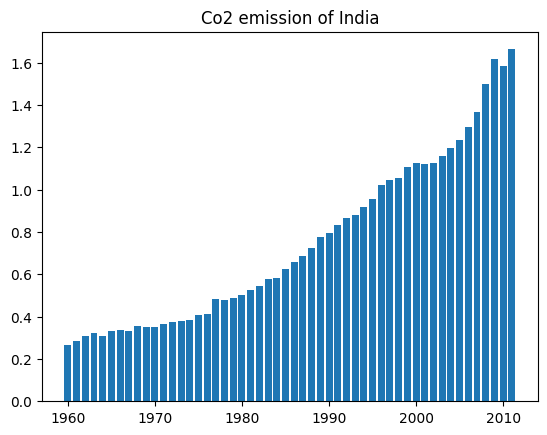

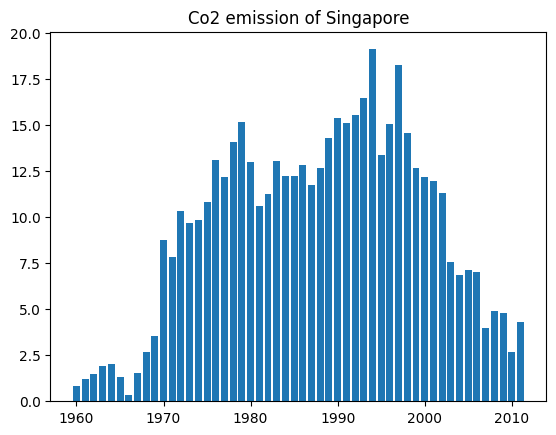

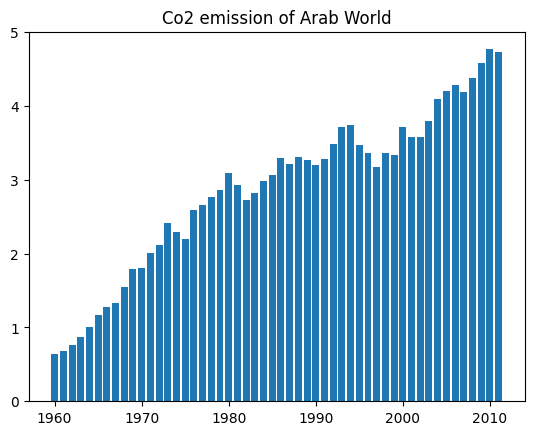

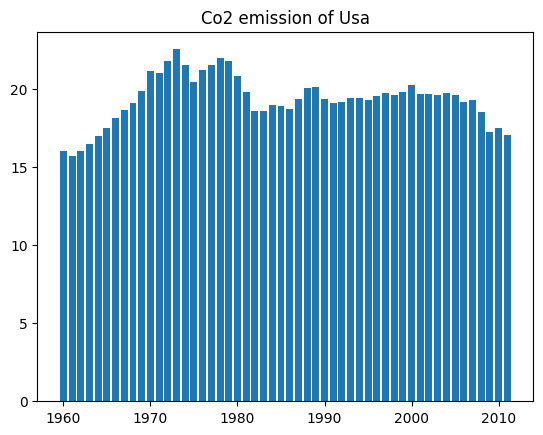

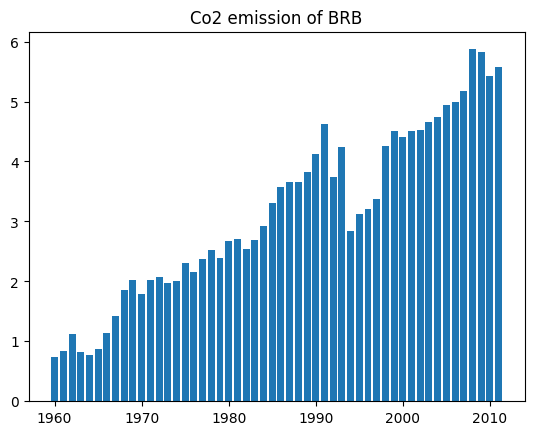

In [39]:
years = dataOfIndia['Year'].values
co2 = dataOfIndia['Value'].values
plt.bar(years,co2)
plt.title('Co2 emission of India')
plt.show()

years = dataOfSgp['Year'].values
co2 = dataOfSgp['Value'].values
plt.bar(years,co2)
plt.title('Co2 emission of Singapore')
plt.show()

years = dataOfArb['Year'].values
co2 = dataOfArb['Value'].values
plt.bar(years,co2)
plt.title('Co2 emission of Arab World')
plt.show()

years = dataOfUsa['Year'].values
co2 = dataOfUsa['Value'].values
plt.bar(years,co2)
plt.title('Co2 emission of Usa')
plt.show()

years = dataOfBrb['Year'].values
co2 = dataOfBrb['Value'].values
plt.bar(years,co2)
plt.title('Co2 emission of BRB')
plt.show()

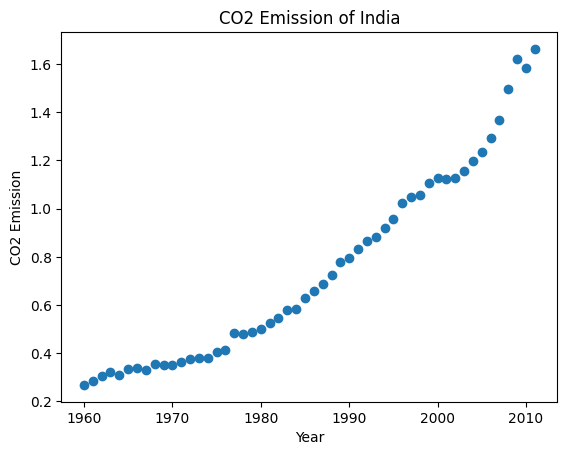

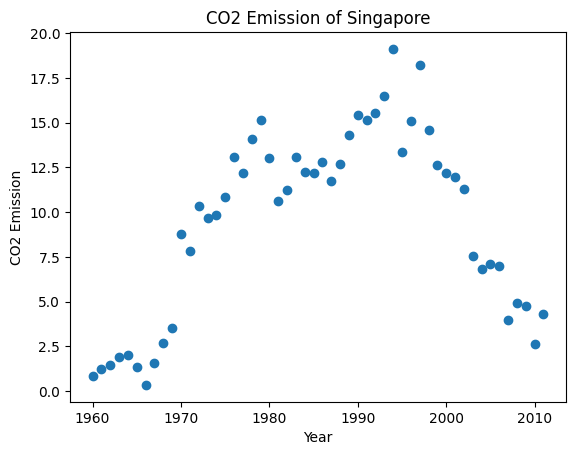

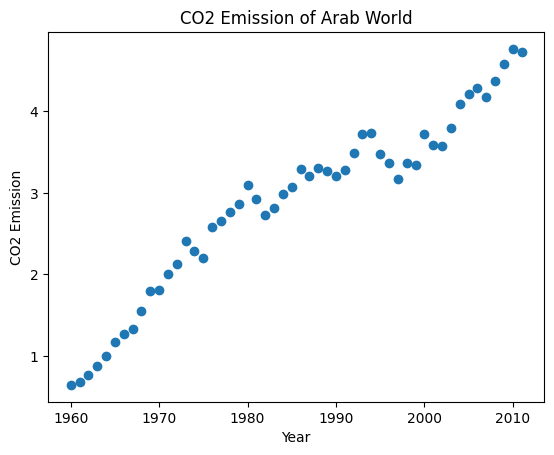

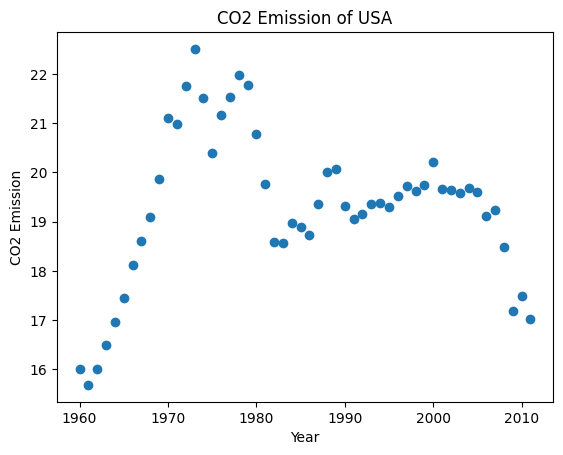

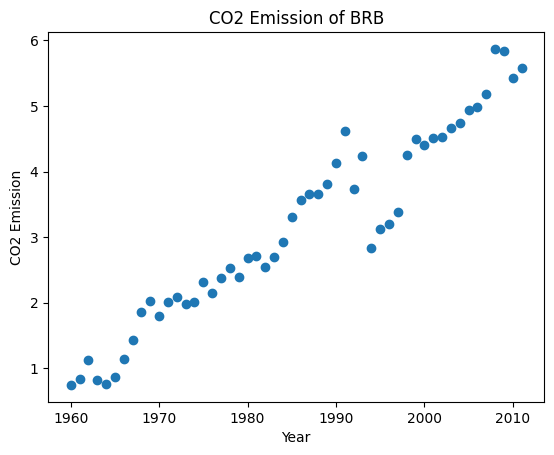

In [40]:
years = dataOfIndia['Year'].values
co2 = dataOfIndia['Value'].values
plt.scatter(years, co2)
plt.title('CO2 Emission of India')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.show()

years = dataOfSgp['Year'].values
co2 = dataOfSgp['Value'].values
plt.scatter(years, co2)
plt.title('CO2 Emission of Singapore')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.show()

years = dataOfArb['Year'].values
co2 = dataOfArb['Value'].values
plt.scatter(years, co2)
plt.title('CO2 Emission of Arab World')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.show()

years = dataOfUsa['Year'].values
co2 = dataOfUsa['Value'].values
plt.scatter(years, co2)
plt.title('CO2 Emission of USA')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.show()

years = dataOfBrb['Year'].values
co2 = dataOfBrb['Value'].values
plt.scatter(years, co2)
plt.title('CO2 Emission of BRB')
plt.xlabel('Year')
plt.ylabel('CO2 Emission')
plt.show()


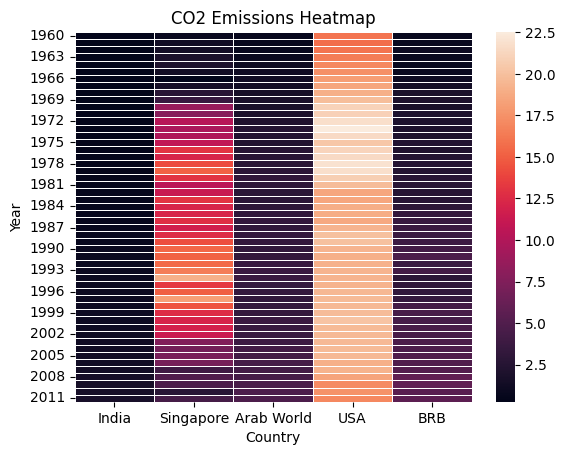

In [41]:
dataHeatMap = {
    'India': dataOfIndia.set_index('Year')['Value'],
    'Singapore': dataOfSgp.set_index('Year')['Value'],
    'Arab World': dataOfArb.set_index('Year')['Value'],
    'USA': dataOfUsa.set_index('Year')['Value'],
    'BRB': dataOfBrb.set_index('Year')['Value']
}

df = pd.DataFrame(dataHeatMap)


sns.heatmap(df,linewidths=.5)
plt.title('CO2 Emissions Heatmap')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()


# Splitting the model

In [34]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [35]:
# x stores all independent variables(or)features
x=data.drop(columns=['Value','IndicatorCode'],axis=1)
# y stores all dependent variables
y=data['Value']

In [36]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


# Model Building

In [43]:
n = len(y)
k = x.shape[0]

### linear Regression

In [45]:
lin_reg = LinearRegression()



In [46]:
lin_reg.fit(x_train, y_train)


LinearRegression()

In [47]:
one_pred_lin_reg=lin_reg.predict(x_test)
two_pred_lin_reg=lin_reg.predict(x_train)


In [115]:
mae_linear=mean_absolute_error(y_test,one_pred_lin_reg)
print(f"mean absolute error for linear_regression is :{mae_linear}")

mean absolute error for linear_regression is :2179390902451.5435


In [49]:
mse_lin_reg = mean_squared_error(y_test, one_pred_lin_reg)
print(f'Linear Regression MSE: {mse_lin_reg}')
lin_reg.score(x_test,y_test)

Linear Regression MSE: 2.3664620738212395e+27


0.0002686736146634283

In [79]:
r_squared=lin_reg.score(x_train,y_train)
print(f'Rsquared value is {r_squared}')
print(f"mse for train data set", mean_squared_error(y_train,two_pred_lin_reg))

Rsquared value is 0.00024196666451214988
mse for train data set 2.3388476124039764e+27


In [78]:
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)
print(adjusted_r_squared)

0.00023312926973717563


### Ridge Regression

In [51]:
ridge_reg = Ridge()

In [52]:
x=np.logspace(-4, 4, 50)
param_distributions = {'alpha': x}

In [53]:

ridge_random = RandomizedSearchCV(ridge_reg, param_distributions, n_iter=10,random_state=42)
ridge_random.fit(x_train, y_train)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511...
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
                   random_state=42)

In [54]:
ridgebest_alpha = ridge_random.best_params_
best_score = ridge_random.best_score_
print(best_score)
print(ridgebest_alpha)

0.0002386836157977523
{'alpha': 6866.488450042998}


In [91]:
r_squared1=ridge_random.score(x_train,y_train)
print(f"r_squared value is :{r_squared1}" )

r_squared value is :0.0002419666645012697


In [92]:
adjusted_r_squared1 = 1 - (1 - r_squared1) * (n - 1) / (n - k - 1)
print(f"adjusted R squared value is:{adjusted_r_squared1}")

adjusted R squared value is:0.00023312926972629544


In [118]:
y_pred3=ridge_random.predict(x_test)

In [119]:
mae_ridge=mean_absolute_error(y_test,y_pred3)
print(f"mean absolute error for ridge_regression is :{mae_ridge}")

mean absolute error for ridge_regression is :2179389203351.5894


In [94]:
mse5=mean_squared_error(y_test,y_pred3)
mse5

2.3664620741619075e+27

### Decision Tree Regressor

In [58]:
tree_reg = DecisionTreeRegressor()
param_distributions = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}


In [59]:
tree_random = RandomizedSearchCV(tree_reg, param_distributions, n_iter=100, cv=5, random_state=42, n_jobs=-1)
tree_random.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
77 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002278212E9F0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000227820EE240>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000227F0FB3E00>},
                   random_state=42)

In [60]:
test_pred_tree = tree_random.predict(x_test)
train_pred_tree=tree_random.predict(x_train)

In [61]:
best_params = tree_random.best_params_
best_score = tree_random.best_score_
print(best_params)
print(best_score) # for train data Score

{'max_depth': 19, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.723929357113349


In [97]:
r_squared2=tree_random.score(x_train,y_train)
print(f"R2 score value is: {r_squared2}")
adjusted_r_squared2 = 1 - (1 - r_squared2) * (n - 1) / (n - k - 1)
print('adjusted R2 score value is :',adjusted_r_squared2)


R2 score value is: 0.8565162068304613
adjusted R2 score value is : 0.8565149385006436


In [98]:
mse1=mean_squared_error(test_pred_tree,y_test)
mse2=mean_squared_error(train_pred_tree,y_train)

In [99]:
print(mse2) # train 
print(mse1) # test

3.356679475268885e+26
5.696279458767446e+26


In [120]:
mae_DTree=mean_absolute_error(y_test,test_pred_tree)
print(f"mean absolute error for linear_regression is :{mae_DTree}")

mean absolute error for linear_regression is :517578714625.5952


### XGBoost regression

In [65]:
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_reg.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [66]:
y_pred_xgb = xgb_reg.predict(x_test)


In [121]:
mae_XGB=mean_absolute_error(y_test,y_pred_xgb)
print(f"mean absolute error for linear_regression is :{mae_XGB}")

mean absolute error for linear_regression is :2051870348116.5146


In [67]:
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Regression MSE: {mse_xgb}')
print(xgb_reg.score(x_train,y_train))
print(xgb_reg.score(x_test,y_test))

XGBoost Regression MSE: 1.7127083409170892e+27
0.3248889392152211
0.2764523039190644


In [108]:
r_squared3=xgb_reg.score(x_train,y_train)
adjusted_r_squared3 = 1 - (1 - r_squared3) * (n - 1) / (n - k - 1)
print(f"the adjusted R2 value is:{adjusted_r_squared3}")

the adjusted R2 value is:0.3248829715482836


### Random Forest Regression

In [37]:
model=RandomForestRegressor(n_estimators=10,random_state=52,n_jobs=-1)

In [38]:
model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=52)

In [39]:
y_pred_random =model.predict(x_test)
train_pred=model.predict(x_train)
mse_random = mean_squared_error(y_test, y_pred_random)
print(f'Random Forest Regression MSE: {mse_random}')
score1=model.score(x_train,y_train) 


Random Forest Regression MSE: 1.700880772252512e+26


In [40]:
mae_Random=mean_absolute_error(y_test,y_pred_random)
print(f"mean absolute error for linear_regression is :{mae_Random}")

mean absolute error for linear_regression is :188752553779.6081


In [41]:
mse_random_train=mean_squared_error(y_train,train_pred)
score=model.score(x_test,y_test)
print(f"R2 score value is :{score}")
score1=model.score(x_train,y_train)

R2 score value is :0.9281448957378994


In [44]:
adjusted_r_squared4 = 1 - (1 - score1) * (n - 1) / (n - k - 1)
print(f"adjusted_r_squared value is :{adjusted_r_squared4}")

adjusted_r_squared value is :95714.4998056875


In [45]:
print(f'Random Forest Regression R2 Score: {score1}')

Random Forest Regression R2 Score: 0.9830788955337789


In [46]:
# as we can see Random Forest Regressor has better score and mse 
# so, we are continuing with Random Forest Regressor as the model

# saving the model

In [73]:
import pickle 

In [ ]:
pickle.dump(model,open("CO2predection","wb"))